In [1]:
import pandas as pd
import pickle
import numpy as np
from scipy import stats
from collections import defaultdict
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
# read in the data
with open("../../data/qualitative_data/individual_model_all_scores.p", "rb") as fp:
    all_model_scores = pickle.load(fp)

with open("../../data/qualitative_data/all_individual_exogenous_variables.p", "rb") as fp:
    all_model_exo = pickle.load(fp)
    
with open("../../data/qualitative_data/all_lqr_scores.p", "rb") as fp:
    lqr_scores = pickle.load(fp)

with open("../../data/qualitative_data/all_lqr_exo.p", "rb") as fp:
    lqr_exo = pickle.load(fp)
    
results_folder = "../../figures/"
all_model_scores['lqr'] = lqr_scores
all_model_exo['lqr'] = lqr_exo

In [3]:
len(all_model_scores["sparse_max_continuous"]) / 11

300.0

In [4]:
# print all the median model scores
for model in all_model_scores:
    med = np.median(all_model_scores[model])
    iqr = stats.iqr(all_model_scores[model])
    print(f"{model}: {np.round(med,1)} ({np.round(iqr,1)})")

null_model_2: 505.4 (556.0)
hill_climbing: 138.1 (124.9)
sparse_max_discrete: 119.4 (118.0)
sparse_lqr: 83.8 (117.0)
sparse_max_continuous: 263.8 (300.1)
null_model_1: 492.9 (539.8)
lqr: 4.7 (4.0)


In [5]:
# compute the norm standard deviation and number of variables into a dictionary for each model
all_model_n_var = defaultdict(list)
all_model_norm_std = defaultdict(list)
for model in all_model_exo:
    for action in all_model_exo[model]:
        all_model_n_var[model].append(len([x for x in action if x != 0]))
    
    for i in range(0,len(all_model_exo[model]), 10):
        run = all_model_exo[model][i:i+10]
        all_model_norm_std[model].append(np.std([np.linalg.norm(x) for x in run]))

In [6]:
# print the medians and interquartile ranges for number of variables manipulated
for model in all_model_n_var:
    med = np.median(all_model_n_var[model])
    iqr = stats.iqr(all_model_n_var[model])
    print(f"{model}: {med} ({iqr})")

null_model_2: 0.0 (0.0)
hill_climbing: 4.0 (0.0)
sparse_max_discrete: 1.0 (1.0)
sparse_lqr: 1.0 (2.0)
sparse_max_continuous: 1.0 (2.0)
null_model_1: 1.0 (0.0)
lqr: 4.0 (0.0)


In [7]:
# print the medians and interquartile ranges for the standard deviation of input norms
for model in all_model_norm_std:
    med = np.median(all_model_norm_std[model])
    iqr = stats.iqr(all_model_norm_std[model])
    print(f"{model}: {np.round(med,2)} ({np.round(iqr,2)})")

null_model_2: 0.0 (0.0)
hill_climbing: 2.12 (2.78)
sparse_max_discrete: 13.31 (11.14)
sparse_lqr: 11.93 (24.31)
sparse_max_continuous: 4.87 (9.59)
null_model_1: 0.3 (0.08)
lqr: 1.1 (0.88)


Read the human data to compute statistics involving human performance

In [8]:
pp_data_file = '../../data/experimental_data/experiment_actions.csv'
n_pps = 111

In [9]:
# read the participant data
df_human = pd.read_csv(pp_data_file)
df_pps = df_human.loc[df_human.groupby('pp_id')['id'].idxmax()]
df_pps['root_cost'] = df_pps['total_cost'].apply(np.sqrt)  # compute the root human costs

In [10]:
# test lqr vs human scores
stats.kruskal(all_model_scores['lqr'], df_pps['root_cost'])

KruskalResult(statistic=180.58857243767764, pvalue=3.6050576193048015e-41)

Plot histograms of model performances and qualitative measures

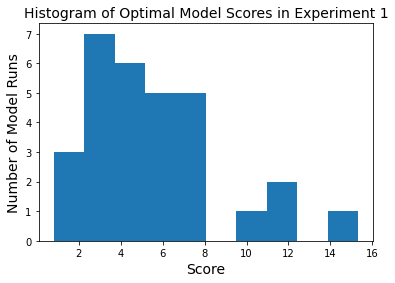

In [11]:
# Plot the LQR scores with a scale appropriate for the scores it achieves
plt.hist(all_model_scores['lqr'][:30])
plt.title("Histogram of Optimal Model Scores in Experiment 1", fontsize=14)
plt.ylabel("Number of Model Runs", fontsize=14)
plt.xlabel("Score", fontsize=14)
plt.savefig("../../figures/lqr_scores_newscale.pdf")

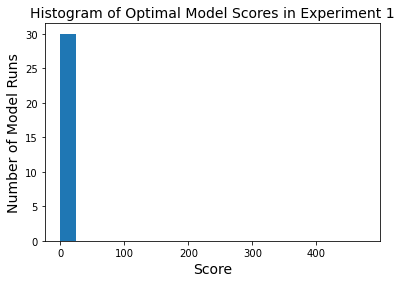

In [12]:
# Plot the LQR scores with the same scale as the human performance plot
plt.hist(all_model_scores['lqr'][:30], bins=np.arange(0,500,25))
plt.title("Histogram of Optimal Model Scores in Experiment 1", fontsize=14)
plt.ylabel("Number of Model Runs", fontsize=14)
plt.xlabel("Score", fontsize=14)
plt.savefig("../../figures/lqr_scores_samescale.pdf")

Plot the standard deviation of input norms for each model type

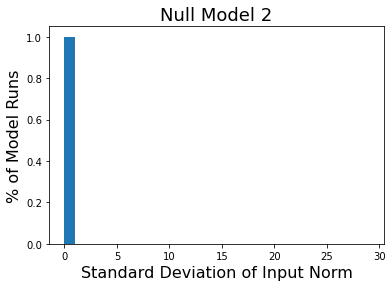

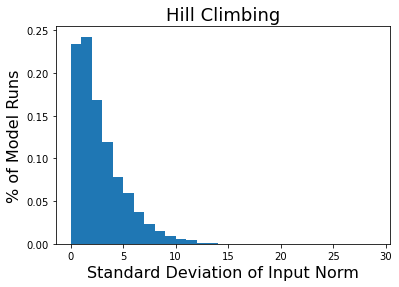

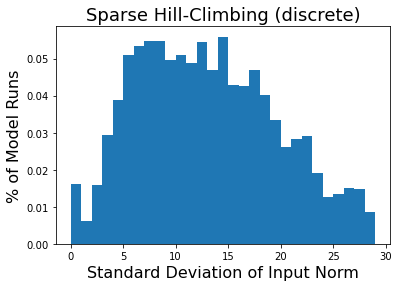

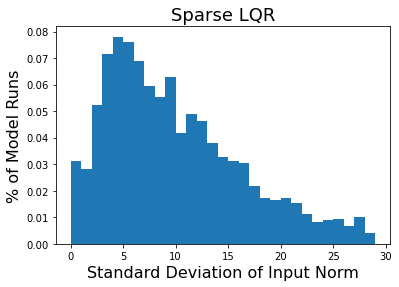

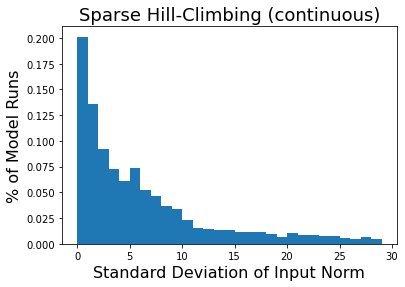

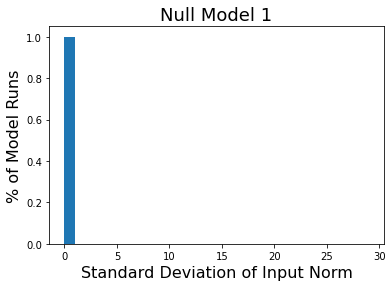

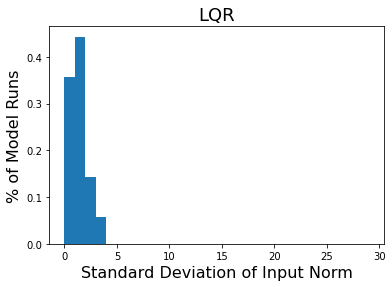

In [13]:
model_names = {"null_model_2": "Null Model 2", "null_model_1": "Null Model 1", "sparse_lqr": "Sparse LQR", "sparse_max_discrete": "Sparse Hill-Climbing (discrete)", "sparse_max_continuous": "Sparse Hill-Climbing (continuous)", "hill_climbing": "Hill Climbing", "lqr": "LQR"}

# Plot (and save) the input norm standard deviations for all models
all_model_input_norm_stds = {}
for model_type in all_model_exo.keys():
    input_norm_stds = []
    
    for i in range(0,len(all_model_exo[model_type]),10):
        run = all_model_exo[model_type][i:i+10]
        input_norm_stds.append(np.std([np.linalg.norm(x) for x in run]))
        all_model_input_norm_stds[model_type] = input_norm_stds
        
    bins = np.arange(0,30,1)
    plt.hist(input_norm_stds, bins, density=True)
    plt.title(f"{model_names[model_type]}", fontsize=18)
    plt.xlabel("Standard Deviation of Input Norm", fontsize=16)
    plt.ylabel("% of Model Runs", fontsize=16)
    plt.savefig(results_folder + f"input_norms_{model_type}.pdf")
    plt.show()

Plot the number of variables manipulated for each model type

null_model_2


<ipython-input-14-be984375006f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


hill_climbing


<ipython-input-14-be984375006f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


sparse_max_discrete


<ipython-input-14-be984375006f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


sparse_lqr


<ipython-input-14-be984375006f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


sparse_max_continuous


<ipython-input-14-be984375006f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


null_model_1


<ipython-input-14-be984375006f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-14-be984375006f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


lqr


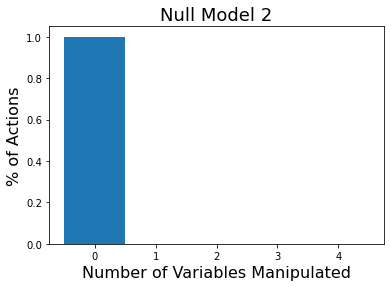

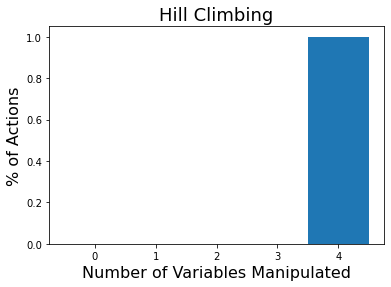

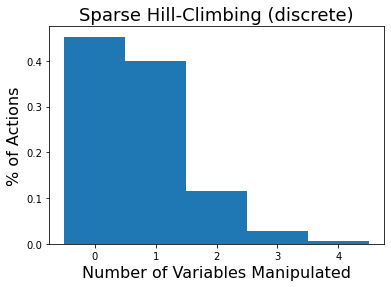

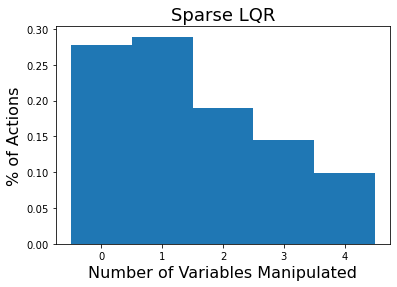

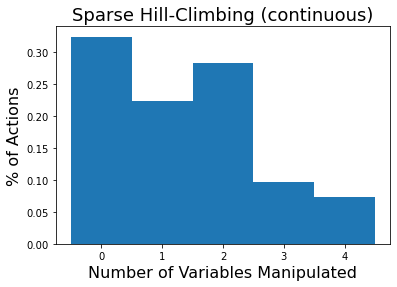

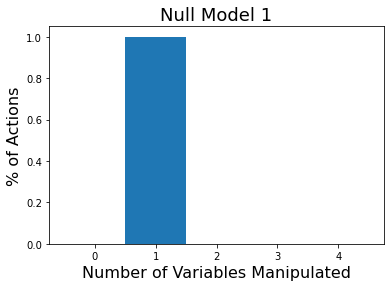

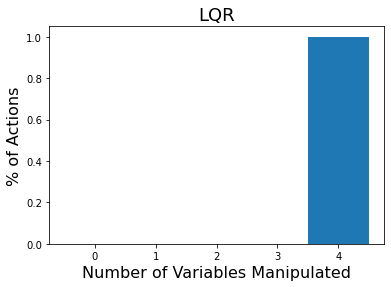

In [14]:
# Plot the number of variables manipulated for all models 
for model_type in all_model_exo.keys():
    print(model_type)
    all_n_var = []
    for exo in all_model_exo[model_type]:
        all_n_var.append(len([x for x in exo if x != 0]))
    
    bins = np.arange(0,6,1)
    fig, ax = plt.subplots()
    ax.hist(all_n_var, bins, density=True)
    ax.set_title(f"{model_names[model_type]}", fontsize=18)
    ax.set_xlabel("Number of Variables Manipulated", fontsize=16)
    ax.set_ylabel("% of Actions", fontsize=16)
    ax.set_xticks(np.arange(0.5, 5.5, 1))
    ax.set_xticklabels(range(5))
    fig.savefig(results_folder + f"n_vars_{model_type}.pdf")
    fig.show()

In [15]:
# compute all the exogenous variables, input norms, and number of variables manipulated
all_human_exo = [literal_eval(x) for x in df_human['exogenous_input']]
all_human_norms = [np.linalg.norm(exo) for exo in all_human_exo]
all_human_n_var = [len([x for x in exo if x == 0]) for exo in all_human_exo]

Plot the standard deviation of input norm and number of variables manipulated for humans

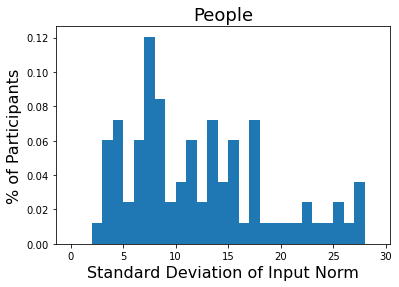

In [16]:
# compute the input norm standard deviations for humans
human_input_norm_stds = []
for pp in df_human['pp_id'].drop_duplicates():
    df_pp = df_human[df_human['pp_id'] == pp]
    run = df_pp['exogenous_input']
    human_input_norm_stds.append(np.std([np.linalg.norm(literal_eval(x)) for x in run]))

# plot the input norm standard deviations
bins = np.arange(0,30,1)
plt.hist(human_input_norm_stds, bins, density=True)
plt.title(f"People", fontsize=18)
plt.xlabel("Standard Deviation of Input Norm", fontsize=16)
plt.ylabel("% of Participants", fontsize=16)
plt.savefig(results_folder + f"input_norms_human.pdf")
plt.show()

<ipython-input-17-5a998e1a83f4>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


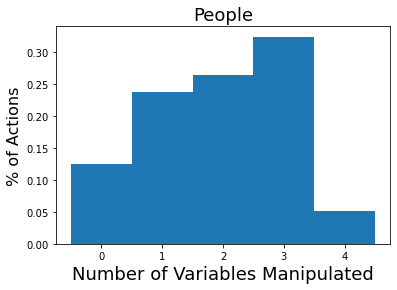

In [17]:
# plot the number of variables manipulated by humans
bins = np.arange(0,6,1)
fig, ax = plt.subplots()
ax.hist(all_human_n_var, bins, density=True)
ax.set_title(f"People", fontsize=18)
ax.set_xlabel("Number of Variables Manipulated", fontsize=18)
ax.set_ylabel("% of Actions", fontsize=16)
ax.set_xticks(np.arange(0.5, 5.5, 1))
ax.set_xticklabels(range(5))
fig.savefig(results_folder + f"n_vars_human.pdf")
fig.show()

Run the statistical tests

In [18]:
for model in all_model_n_var:
    print(f"humans vs {model}: {np.median(all_human_n_var)} vs. {np.median(all_model_n_var[model])} {stats.kruskal(all_human_n_var, all_model_n_var[model])}")

humans vs null_model_2: 2.0 vs. 0.0 KruskalResult(statistic=32325.296148270518, pvalue=0.0)
humans vs hill_climbing: 2.0 vs. 4.0 KruskalResult(statistic=94995.95371845171, pvalue=0.0)
humans vs sparse_max_discrete: 2.0 vs. 1.0 KruskalResult(statistic=1312.0479279378826, pvalue=2.722997777792553e-287)
humans vs sparse_lqr: 2.0 vs. 1.0 KruskalResult(statistic=162.89334929014282, pvalue=2.6394936412363893e-37)
humans vs sparse_max_continuous: 2.0 vs. 1.0 KruskalResult(statistic=262.35346517910995, pvalue=5.266543159964704e-59)
humans vs null_model_1: 2.0 vs. 1.0 KruskalResult(statistic=3369.618394265102, pvalue=0.0)
humans vs lqr: 2.0 vs. 4.0 KruskalResult(statistic=2094.5546995027803, pvalue=0.0)


In [19]:
for model in all_model_input_norm_stds:
    print(f"humans vs {model}: {np.median(human_input_norm_stds)} vs. {np.median(all_model_input_norm_stds[model])} {stats.kruskal(human_input_norm_stds, all_model_input_norm_stds[model])}")

humans vs null_model_2: 14.681139904908841 vs. 0.0 KruskalResult(statistic=3708.8599171088276, pvalue=0.0)
humans vs hill_climbing: 14.681139904908841 vs. 2.121385122712921 KruskalResult(statistic=278.54058962278214, pvalue=1.561815974723762e-62)
humans vs sparse_max_discrete: 14.681139904908841 vs. 13.305663019904717 KruskalResult(statistic=5.040486906129223, pvalue=0.024761529282458828)
humans vs sparse_lqr: 14.681139904908841 vs. 11.93454623876483 KruskalResult(statistic=1.9728916755268462, pvalue=0.16014126116655614)
humans vs sparse_max_continuous: 14.681139904908841 vs. 4.873203782074274 KruskalResult(statistic=90.36048452784947, pvalue=1.9849102437317286e-21)
humans vs null_model_1: 14.681139904908841 vs. 0.30214507348267416 KruskalResult(statistic=296.1462450592885, pvalue=2.2771550647978802e-66)
humans vs lqr: 14.681139904908841 vs. 1.1029045079896298 KruskalResult(statistic=183.802333756147, pvalue=7.165778314407158e-42)
